In [5]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython import display
import cv2
from scipy.interpolate import splprep, splev

In [6]:
model = YOLO(model='/home/sebastian/robogistics/robologics_brause/src/robogistics_brause/robogistics_brause/object_detection/Yolov8_model/weights/best.pt')
img = '/home/sebastian/robogistics/robologics_brause/src/robogistics_brause/robogistics_brause/object_detection/sebbi.png'


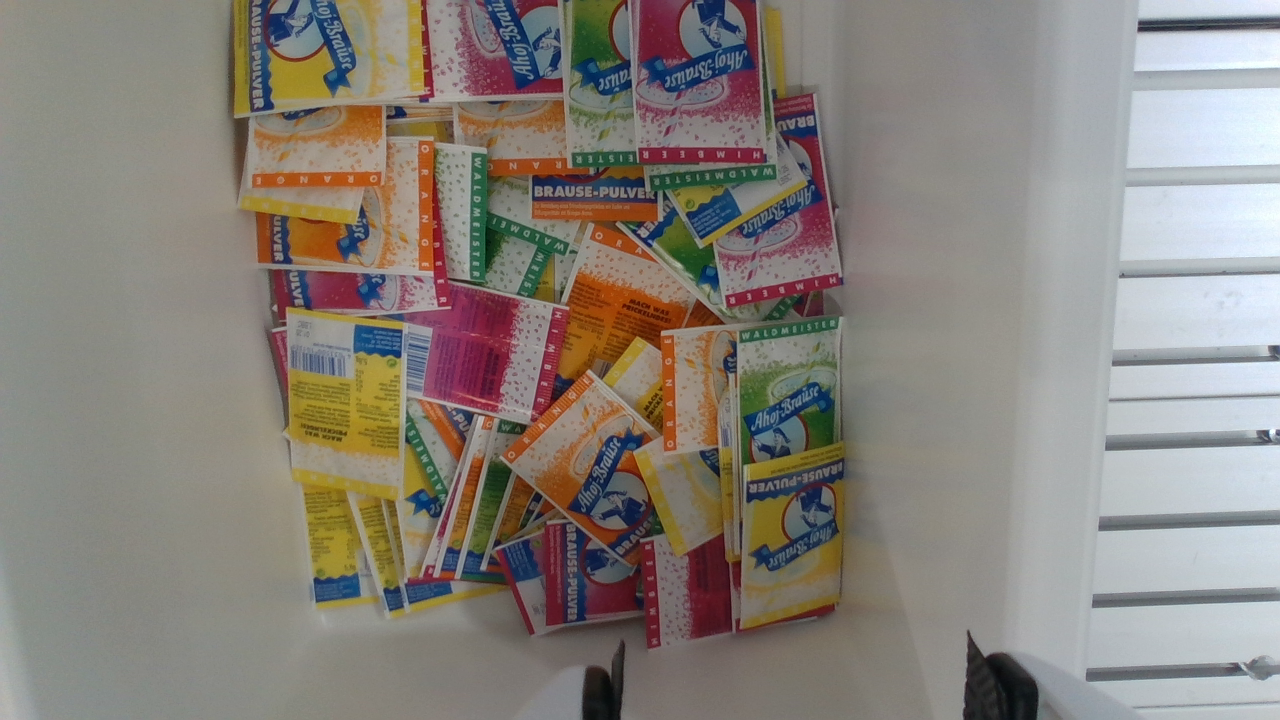

In [7]:

display.Image(img)


In [ ]:

results = model.predict(source=img, save=True, save_txt=False, stream=True)
for result in results: # only on result in results
    
    # get array results
    all_masks = result.masks.data
    boxes = result.boxes.data
    color = boxes[:, 5] #
    idx_masks_color = torch.where(color == 3) # index of the chosen coulour
    # use these indices to extract the relevant masks
    for index in idx_masks_color:
        color_masks = all_masks[index]
        result_masks = [[],[]]
        for i in range(len(color_masks)):

            result_mask = color_masks[i].cpu().numpy()
            result_masks[0].append(np.count_nonzero(result_mask))
            result_masks[1].append(result_mask)

final_mask_size_list, final_mask_list = (list(t) for t in zip(*sorted(zip(result_masks[0], result_masks[1]), reverse=True)))

print(type(final_mask_list[0]))
binary_array = np.where(final_mask_list[0] != 0, 1, 0)
binary_image = Image.fromarray(binary_array.astype('uint8')*255)

binary_image.save('binary_image.png')
binary_image.show()
    

In [ ]:
def getPixelCoordinates(self, mask, color_image):
        
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # find contours
        biggest_contour = max(contours, key = cv2.contourArea) # find the biggest contour (c) by the area

        # find the center of the contour
        M = cv2.moments(biggest_contour)
        x_pixelkoordinate = int(M['m10']/M['m00'])
        y_pixelkoordinate = int(M['m01']/M['m00'])

        # find the spline
        tck, u = splprep(biggest_contour[:,0,:].T, s=0.0)    
        u_new = np.linspace(u.min(), u.max(), 1000) 
        x_new, y_new = splev(u_new, tck, der=0)

        # Show the original image with the contour
        image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.plot(x_new, y_new, 'r')
        plt.plot(x_pixelkoordinate, y_pixelkoordinate, 'bo') 

        # Save the plot image in the "images_realsense/" folder with the filename
        plt.savefig(os.path.join(self.folder_path, filename))

        return x_pixelkoordinate, y_pixelkoordinate